In [1]:
import os
import scipy.sparse
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def read_calculate_anchor_single_dir(dir):
    """requires the directory to include .h5ad files and .npz files only """
    li_int = [int(fname.split('.')[0]) for fname in os.listdir(dir) if fname.endswith('.h5ad')]
    li_int.sort()

    num_anch_li = []
    for id in li_int[:-1]:
        pi_path = os.path.join(dir, '{}.npz'.format(id))
        if os.path.isfile(pi_path):
            pi = scipy.sparse.load_npz(pi_path).todense()
            num_anch = np.squeeze(np.asarray(np.sum((pi > 0), axis=0)))

            num_anch_li.append(num_anch)

            # plt.figure()
            # plt.hist(num_anch, bins=10)

        else:
            num_anch_li.append(None)
    return num_anch_li


def read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li):
    """
    calculate anchor distributions across different tissues and methods
    """
    tissue_mtd_anch = {}
    for tissue in tissue_li:
        for mtd in mtd_li:
            # print(tissue, mtd)
            # print(os.listdir(all_data_output))
            fo = [fo for fo in os.listdir(all_data_output) if tissue in fo and fo.endswith(mtd)][0]
            dir = os.path.join(all_data_output, fo)  # single tissue, single method, multiple slices
            
            num_anch_li = read_calculate_anchor_single_dir(dir)
            # print(tissue + '_' + mtd, num_anch_li)
            tissue_mtd_anch[tissue + '_' + mtd] = num_anch_li
    return tissue_mtd_anch

##### Prepare all data to be analyzed, and summarzie maximum number of anchor of each slice across them

DLPFC

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['DLPFC_p_2'] # , 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

tissue_li_abla = ['DLPFC_p_2']
mtd_li_abla = ['ours_ablation']
tissue_mtd_anch_abla = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li_abla, mtd_li_abla)

tissue_mtd_anch.update(tissue_mtd_anch_abla)
tissue_mtd_anch.keys()

In [ ]:
anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

(Ablation experiment) To compare anchor number distribution on our method with and without weighted boundary condition

option 1: voilin plot showing discrete values: confusing width, ansolute value not intuitive

In [ ]:
plt.figure(figsize=(8,3))
for i in range(len(tissue_mtd_anch['DLPFC_p_2_ours_ablation'])):
    plt.violinplot([tissue_mtd_anch['DLPFC_p_2_ours_ablation'][i], tissue_mtd_anch[ 'DLPFC_p_2_ours'][i]], positions = [1+2.5*i, 2+2.5*i], 
               bw_method=0.3, points=10, widths=0.5, showextrema=False)

option 2: histogram

In [ ]:
fig_size = (7, 2.5)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
tissue = 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
mtd_li = ['ours', 'ours_ablation']
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'orange', 'PASTE2': 'gold'}
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/DLPFC_p2_abla'

for i in range(len(tissue_mtd_anch[tissue + '_' + 'ours'])):
    plt.figure(dpi=dpi_val, figsize=fig_size)  
    
    for mtd in mtd_li:
        if tissue_mtd_anch[tissue + '_' + mtd][i] is not None:
            
            if mtd == 'ours_ablation':
                mtd_label = 'ours without distributive constraints'
            else:
                mtd_label = mtd
            plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, 
                          color=mtd_color[mtd], alpha=0.5, label=mtd_label)  # n is mass of each bar, bins is the start and end of all intervals 
            
            kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
            x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
            y4line_kde = kernel(x4line)
            plt.plot(x4line, y4line_kde, c=mtd_color[mtd], linewidth=1.5, ls='--')
            
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    plt.legend()  # todo: comment it
    
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))

###### To compare anchor number distribution on our method and other methods

Drosophila embryo

In [11]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['drosophila_embryo'] # , 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

tissue_li_abla = ['DLPFC_p_2']
mtd_li_abla = ['ours_ablation']
tissue_mtd_anch_abla = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li_abla, mtd_li_abla)

tissue_mtd_anch.update(tissue_mtd_anch_abla)
tissue_mtd_anch.keys()

anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

drosophila_embryo_PASTE [5, 5, 5, 6, 5, 5, 4, 3, 3, 4, 5, 5, 6, 5, 4]
drosophila_embryo_PASTE2 [6, 7, 5, 9, 8, 6, 4, 2, 2, 4, 5, 4, 6, 5, 3]
drosophila_embryo_ours [5, 4, 5, 5, 5, 5, 5, 4, 4, 7, 5, 5, 5, 5, 6]
DLPFC_p_2_ours_ablation [4, 3, 3]

max number of anchors 9


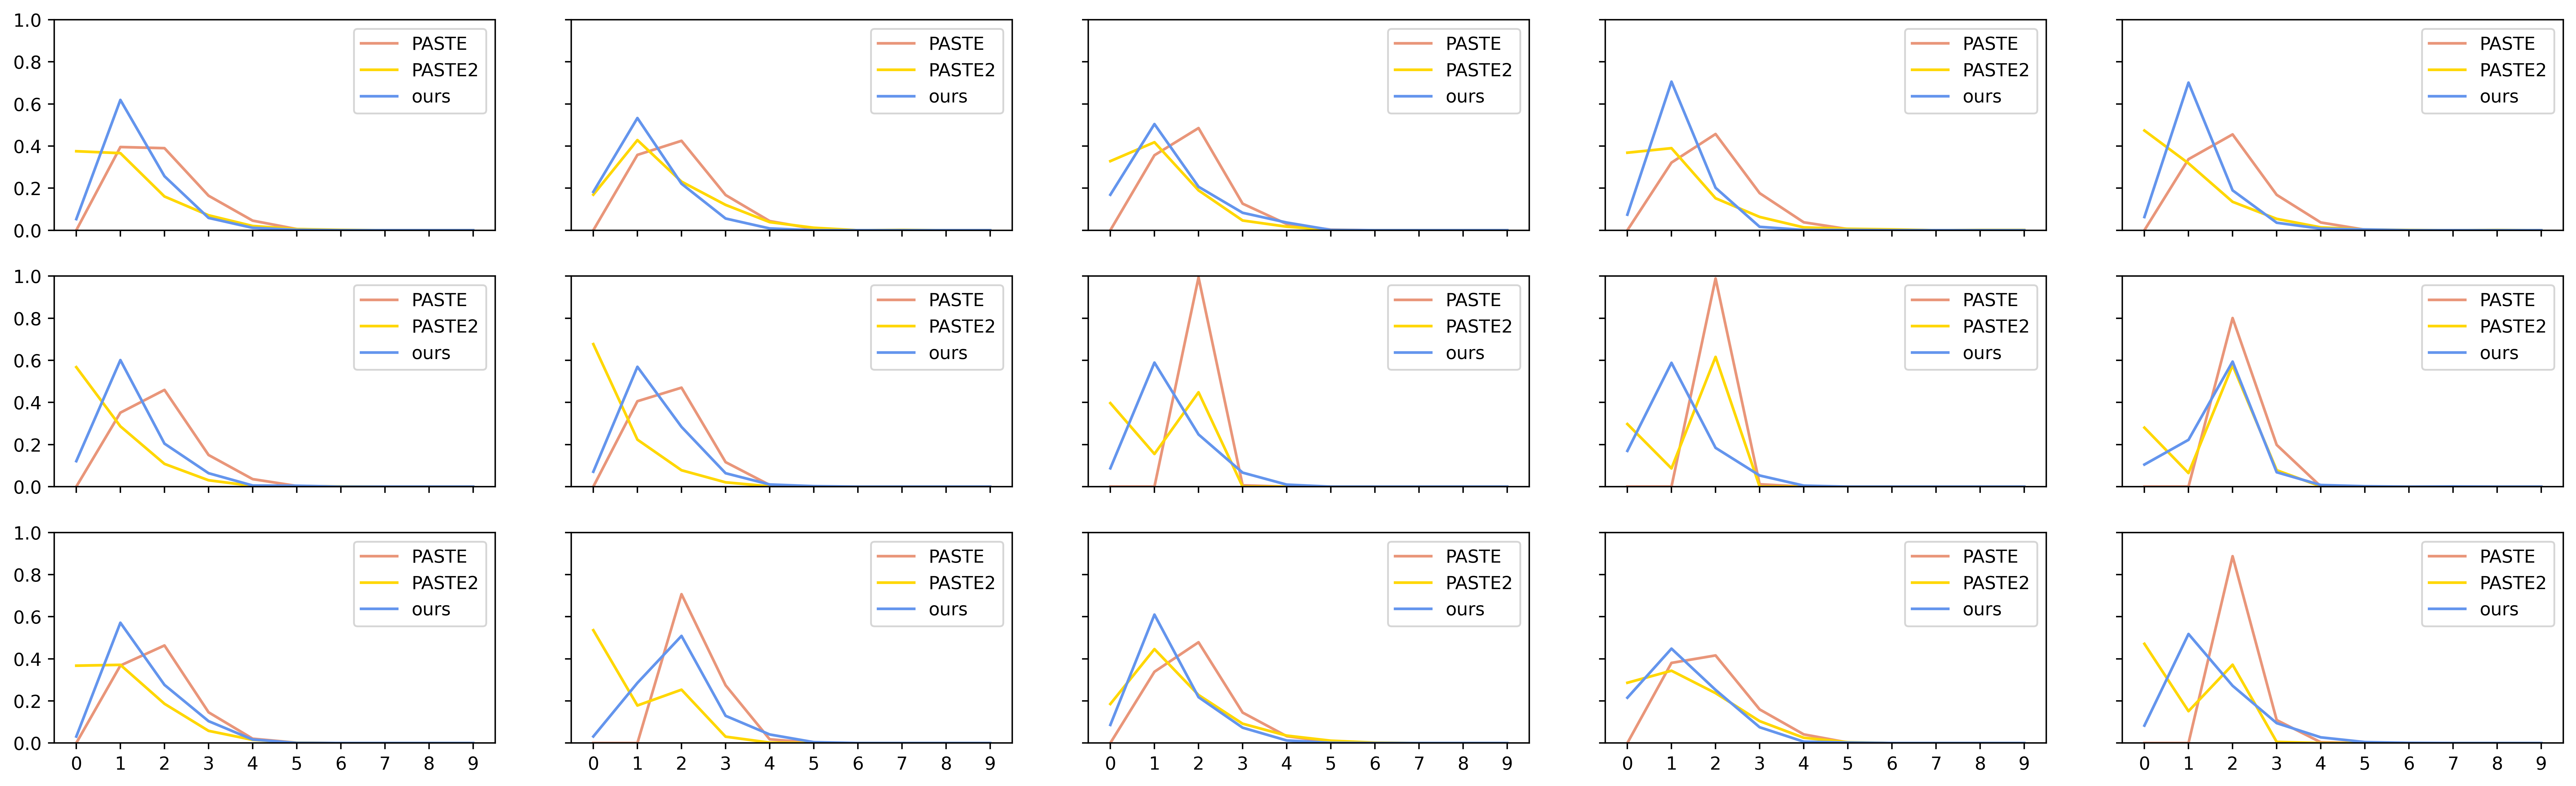

In [51]:
fig_size = (20, 6)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue = 'drosophila_embryo'  # 'drosophila_larva' # 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/drosophila_embryo'
nrows = 3
ncols=5

tissue_mtd_anch_plt = tissue_mtd_anch.copy()
# tissue_mtd_anch_plt = {k:v[5:10] for k, v in zip(tissue_mtd_anch_plt.keys(), tissue_mtd_anch_plt.values())}

fig,  _ = plt.subplots(nrows, ncols, figsize=fig_size, dpi=dpi_val)
fig.tight_layout(pad=0.5)
for i in range(len(tissue_mtd_anch_plt[tissue + '_' + 'ours'])):
    # plt.figure(figsize=fig_size, dpi=dpi_val)
    plt.subplot(nrows, ncols, i +1)
    for mtd in mtd_li:
        if tissue_mtd_anch_plt[tissue + '_' + mtd][i] is not None:
            
#             plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, color=mtd_color[mtd], alpha=0.5, label=mtd)
            
#             kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
#             x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
#             y4line_kde = kernel(x4line)
#             plt.plot(x4line, y4line_kde, c=mtd_color[mtd], linewidth=1.5, ls='--')
    
            hist, bins_edges = np.histogram(tissue_mtd_anch_plt[tissue + '_' + mtd][i], bins=bins_range)
            hist = np.array(hist)
            hist_den = hist / hist.sum()
            bins_c = [(bins_edges[i] + bins_edges[i+1]) /2 for i in range(len(bins_edges)-1)]
            plt.plot(bins_c, hist_den, color=mtd_color[mtd], alpha=1, label=mtd)
            plt.legend()
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))

    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    
    if i // ncols + 1 < nrows:
        plt.tick_params(labelbottom=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    if i % ncols > 0:
        plt.tick_params(labelleft=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    # plt.legend()  
    
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))

Analysis on Drosophila larva

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['drosophila_larva'] # , 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

tissue_li_abla = ['DLPFC_p_2']
mtd_li_abla = ['ours_ablation']
tissue_mtd_anch_abla = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li_abla, mtd_li_abla)

tissue_mtd_anch.update(tissue_mtd_anch_abla)
tissue_mtd_anch.keys()

anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

In [ ]:
fig_size = (8, 6)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue = 'drosophila_larva'  # 'drosophila_larva' # 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/drosophila_larva'
nrows, ncols = (5, 3)

fig,  _ = plt.subplots(nrows, ncols, figsize=fig_size, dpi=dpi_val)
fig.tight_layout(pad=0.08)
for i in range(len(tissue_mtd_anch[tissue + '_' + 'ours'])):
    plt.subplot(nrows, ncols, i + 1)
    
    for mtd in mtd_li:
        if tissue_mtd_anch[tissue + '_' + mtd][i] is not None:
            plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, color=mtd_color[mtd], alpha=0.5, label=mtd)
            if i == len(tissue_mtd_anch[tissue + '_' + 'ours']) -1:
                plt.legend()
            
            kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
            x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
            y4line_kde = kernel(x4line)
            plt.plot(x4line, y4line_kde, c=mtd_color[mtd], linewidth=1.5, ls='--')
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))
    
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    
    if i // ncols + 1 < nrows:
        plt.tick_params(labelbottom=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    if i % ncols > 0:
        plt.tick_params(labelleft=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))

Analysis on DLPFC

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['DLPFC_p_2']  # 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

# tissue_li_abla = ['DLPFC_p_2']
# mtd_li_abla = ['ours_ablation']
# tissue_mtd_anch_abla = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li_abla, mtd_li_abla)

tissue_mtd_anch.update(tissue_mtd_anch_abla)
tissue_mtd_anch.keys()

anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

In [ ]:
fig_size = (7, 7.5)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue = 'DLPFC_p_2'  # 'drosophila_larva' # 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/DLPFC_p2'

fig, _ = plt.subplots(len(tissue_mtd_anch[tissue + '_' + 'ours']), 1, figsize=fig_size, dpi=dpi_val)
for i in range(len(tissue_mtd_anch[tissue + '_' + 'ours'])):
    
    # plt.figure(figsize=fig_size, dpi=dpi_val)
    plt.subplot(len(tissue_mtd_anch[tissue + '_' + 'ours']), 1, i+1)
    for mtd in mtd_li:
        if tissue_mtd_anch[tissue + '_' + mtd][i] is not None:
            plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, color=mtd_color[mtd], alpha=0.5, label=mtd) 
            plt.legend()
            
            kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
            x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
            y4line_kde = kernel(x4line)
            plt.plot(x4line, y4line_kde, c=mtd_color[mtd], linewidth=1.5, ls='--')
      
            if i < len(tissue_mtd_anch[tissue + '_' + 'ours'])-1:
                plt.tick_params(labelbottom=False)
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))

    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    # plt.legend()  # todo: comment it
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))

Analysis on Mouse embryo (E11.5)

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['mouse_embryo_E11.5'] # , 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

tissue_mtd_anch.update(tissue_mtd_anch_abla)
tissue_mtd_anch.keys()

anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

In [ ]:
fig_size = (7, 2.5)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
mtd_li = ['PASTE', 'PASTE2', 'ours']
tissue = 'mouse_embryo_E11.5'  # 'drosophila_larva' # 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/mouse_embryo_E11.5'

for i in range(len(tissue_mtd_anch[tissue + '_' + 'ours'])):
    plt.figure(figsize=fig_size, dpi=dpi_val)
    
    for mtd in mtd_li:
        if tissue_mtd_anch[tissue + '_' + mtd][i] is not None:
            
#             plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, color=mtd_color[mtd], alpha=0.5, label=mtd)
            
#             kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
#             x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
#             y4line_kde = kernel(x4line)
#             plt.plot(x4line, y4line_kde, c=mtd_color[mtd], linewidth=1.5, ls='--')

            hist, bins_edges = np.histogram(tissue_mtd_anch[tissue + '_' + mtd][i], bins=bins_range)
            hist = np.array(hist)
            hist_den = hist / hist.sum()
            bins_c = [(bins_edges[i] + bins_edges[i+1]) /2 for i in range(len(bins_edges)-1)]
            plt.plot(bins_c, hist_den, color=mtd_color[mtd], alpha=1, label=mtd)
            plt.legend()
            
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))

    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    # plt.legend()  # todo: comment it
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))

Mouse hippocampus

In [3]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
tissue_li = ['mouse_hipp'] # , 'drosophila_embryo', 'drosophila_larva', 'mouse_embryo_E11.5']
mtd_li = ['PASTE_0_1_normed_var_corrected', 'PASTE2_0_1_normed_var_corrected', 'ours_0_1_normed_var_corrected']
tissue_mtd_anch = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li, mtd_li)

# tissue_li_abla = ['DLPFC_p_2']
# mtd_li_abla = ['ours_ablation']
# tissue_mtd_anch_abla = read_calculate_anchor_across_tissue_mtd(all_data_output, tissue_li_abla, mtd_li_abla)

# tissue_mtd_anch.update(tissue_mtd_anch_abla)
# tissue_mtd_anch.keys()

anch_num_all = []
for keys in tissue_mtd_anch.keys():
    li_mtd_tissue = [tissue_mtd_anch[keys][i].max() for i in range(len(tissue_mtd_anch[keys])) if tissue_mtd_anch[keys][i] is not None]
    print(keys, li_mtd_tissue)
    anch_num_all += li_mtd_tissue

max_anch = np.array(anch_num_all).max()
print('\nmax number of anchors', max_anch)

mouse_hipp_PASTE_0_1_normed_var_corrected [5]
mouse_hipp_PASTE2_0_1_normed_var_corrected []
mouse_hipp_ours_0_1_normed_var_corrected [6]

max number of anchors 6


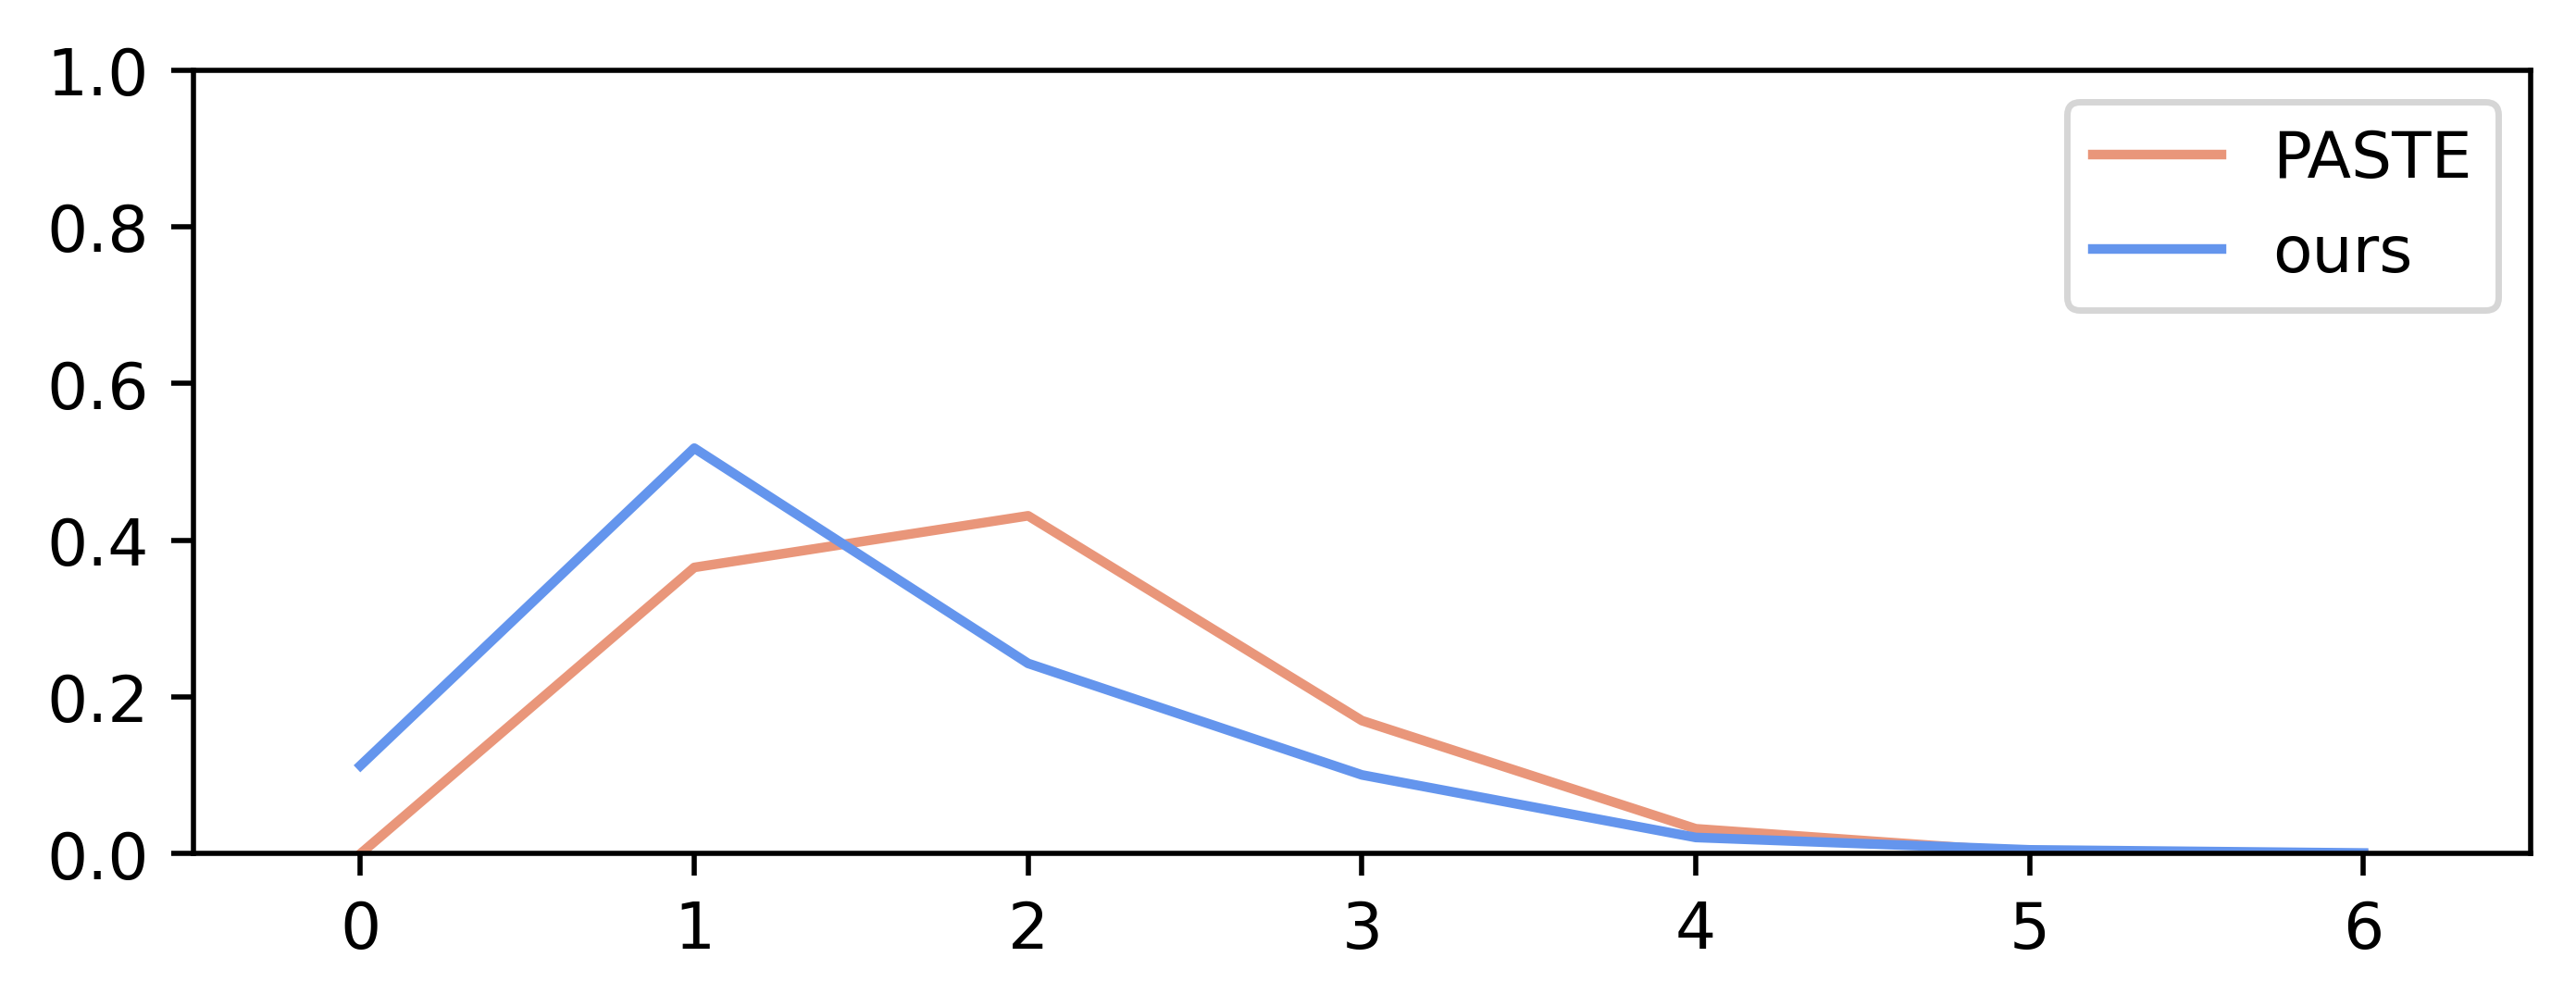

In [10]:
fig_size = (5.5, 2)
dpi_val =  500
rwidth=1
val_min_tol=0
val_max_tol = max_anch 
bins_range = np.arange(val_min_tol-0.5, val_max_tol+1, 1)
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
mtd_li = ['PASTE_0_1_normed_var_corrected', 'PASTE2_0_1_normed_var_corrected', 'ours_0_1_normed_var_corrected']
tissue = 'mouse_hipp'  # 'drosophila_larva' # 'DLPFC_p_2' # 'mouse_embryo_E11.5'# 'drosophila_embryo'
our_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/anch_num/drosophila_larva'
nrows, ncols = (1, 1)

fig,  _ = plt.subplots(nrows, ncols, figsize=fig_size, dpi=dpi_val)
fig.tight_layout(pad=0.08)
for i in range(len(tissue_mtd_anch[tissue + '_' + mtd_li[0]])):
    plt.subplot(nrows, ncols, i + 1)
    
    for mtd in mtd_li:
        if tissue_mtd_anch[tissue + '_' + mtd][i] is not None:
#             plt.hist(tissue_mtd_anch[tissue + '_' + mtd][i], align='mid', bins=bins_range, rwidth=rwidth, histtype='bar', density=True, color=mtd_color[mtd.split('_')[0]], alpha=0.5, label=mtd.split('_')[0])
#             if i == len(tissue_mtd_anch[tissue + '_' + mtd_li[0]]) -1:
#                 plt.legend()
            
#             kernel = stats.gaussian_kde(tissue_mtd_anch[tissue + '_' + mtd][i], bw_method=1)
#             x4line = np.linspace(bins_range.min(), bins_range.max(), 50)
#             y4line_kde = kernel(x4line)
#             plt.plot(x4line, y4line_kde, c=mtd_color[mtd.split('_')[0]], linewidth=1.5, ls='--')
            
            hist, bins_edges = np.histogram(tissue_mtd_anch[tissue + '_' + mtd][i], bins=bins_range)
            hist = np.array(hist)
            hist_den = hist / hist.sum()
            bins_c = [(bins_edges[i] + bins_edges[i+1]) /2 for i in range(len(bins_edges)-1)]
            plt.plot(bins_c, hist_den, color=mtd_color[mtd.split('_')[0]], alpha=1, label=mtd.split('_')[0])
            plt.legend()
            
    plt.xlim(val_min_tol-0.5, val_max_tol+0.5)
    plt.xticks(np.arange(val_min_tol, val_max_tol+1, 1))
    
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.2))
    
    if i // ncols + 1 < nrows:
        plt.tick_params(labelbottom=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    if i % ncols > 0:
        plt.tick_params(labelleft=False) # left=False, bottom=False, labelleft=False, labelbottom=False)
    # plt.savefig(os.path.join(our_dir, '{}.png'.format(i)))